In [2]:
# =========================================================
# 0. IMPORT LIBRARIES
# =========================================================
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

In [4]:
# =========================================================
# 1. LOAD DATA
# =========================================================
df = pd.read_csv("mixed_playlist.csv")

labeled = df[
    (df["user"] != "deleted by hacker") &
    (df["top_year"] != "deleted by hacker")
].copy()

unlabeled = df[
    (df["user"] == "deleted by hacker") |
    (df["top_year"] == "deleted by hacker")
].copy()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3591 non-null   object 
 1   album             3591 non-null   object 
 2   artist            3600 non-null   object 
 3   release_date      3600 non-null   object 
 4   length            3600 non-null   int64  
 5   popularity        3600 non-null   int64  
 6   acousticness      3600 non-null   float64
 7   danceability      3600 non-null   float64
 8   energy            3600 non-null   float64
 9   instrumentalness  3600 non-null   float64
 10  liveness          3600 non-null   float64
 11  loudness          3600 non-null   float64
 12  speechiness       3600 non-null   float64
 13  tempo             3600 non-null   float64
 14  valence           3600 non-null   float64
 15  time_signature    3600 non-null   int64  
 16  key               3600 non-null   int64  


,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
count,3.600000e+03,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,2.408759e+05,32.188333,0.451029,0.559205,0.503709,0.277072,0.164358,-10.720054,0.084946,115.102004,0.389938,3.866111,5.305556,0.464167,2007.343056
std,1.037588e+05,25.478877,0.358561,0.194051,0.260155,0.380640,0.141533,6.320428,0.093436,28.835005,0.256795,0.475421,3.504845,0.498784,101.071018
min,0.000000e+00,0.000000,0.000011,0.000000,0.000545,0.000000,0.017900,-42.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.865740e+05,0.000000,0.086675,0.429000,0.298750,0.000002,0.094100,-13.130750,0.036500,93.856500,0.163000,4.000000,2.000000,0.000000,2011.000000
50%,2.218130e+05,34.000000,0.404500,0.583000,0.528000,0.003100,0.112000,-8.879500,0.046400,114.982500,0.362000,4.000000,5.000000,0.000000,2016.000000
75%,2.699260e+05,52.000000,0.817000,0.707000,0.717000,0.718250,0.168000,-6.375500,0.086300,131.000750,0.583000,4.000000,8.000000,1.000000,2018.000000
max,1.921683e+06,91.000000,0.996000,0.971000,0.991000,0.995000,0.991000,-0.908000,0.952000,209.596000,0.981000,5.000000,11.000000,1.000000,2022.000000


In [5]:
# =========================================================
# 2. FEATURE SELECTION
# =========================================================
feature_cols = [
    "danceability","energy","loudness","speechiness",
    "acousticness","instrumentalness","liveness",
    "valence","tempo","key","mode","time_signature","popularity"
]

X = labeled[feature_cols]
y_user = labeled["user"]
y_year = labeled["top_year"].astype(int)

print("=== SHAPE CHECK (BEFORE SPLIT) ===")
print("X shape:", X.shape)
print("y_user shape:", y_user.shape)
print("y_year shape:", y_year.shape)
print("==================================")
user_counts = y_user.value_counts().sort_index()
print("User class counts:")
print(user_counts)

year_counts = y_year.value_counts().sort_index()
print("Year class counts:")
print(year_counts)

# =========================================================
# 3. TRAIN / TEST SPLIT (SAME SPLIT FOR FAIR COMPARISON)
# =========================================================
X_train, X_test, y_user_train, y_user_test, y_year_train, y_year_test = train_test_split(
    X, y_user, y_year,
    test_size=0.3,
    random_state=0,
    stratify=y_user
)

print("\n=== SHAPE CHECK (AFTER SPLIT) ===")

print("\n--- Features ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("\n--- USER labels ---")
print("y_user_train shape:", y_user_train.shape)
print("y_user_test shape:", y_user_test.shape)

print("\n--- YEAR labels ---")
print("y_year_train shape:", y_year_train.shape)
print("y_year_test shape:", y_year_test.shape)

=== SHAPE CHECK (BEFORE SPLIT) ===
X shape: (3500, 13)
y_user shape: (3500,)
y_year shape: (3500,)
User class counts:
user
alpha      700
beta       700
delta      700
epsilon    700
gamma      700
Name: count, dtype: int64
Year class counts:
top_year
2019    500
2020    500
2021    500
2022    500
2023    500
2024    500
2025    500
Name: count, dtype: int64

=== SHAPE CHECK (AFTER SPLIT) ===

--- Features ---
X_train shape: (2450, 13)
X_test shape: (1050, 13)

--- USER labels ---
y_user_train shape: (2450,)
y_user_test shape: (1050,)

--- YEAR labels ---
y_year_train shape: (2450,)
y_year_test shape: (1050,)


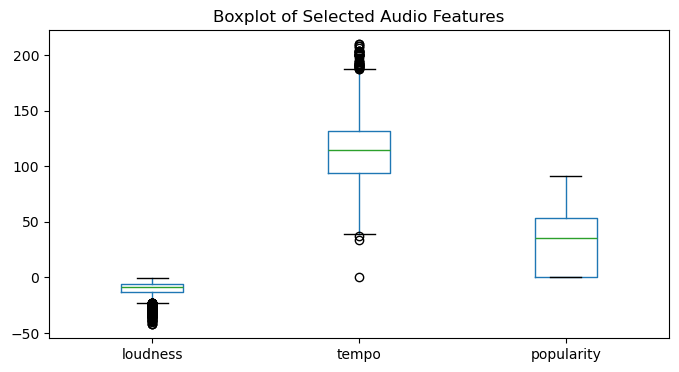

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,popularity
danceability,1.000000,0.480133,0.529924,0.253411,-0.434045,-0.374697,0.017296,0.582346,0.095039,0.033171,-0.017273,0.261405,0.050225
energy,0.480133,1.000000,0.825934,0.248321,-0.781939,-0.297649,0.156101,0.479241,0.175636,0.059548,-0.035956,0.244213,0.059672
loudness,0.529924,0.825934,1.000000,0.197553,-0.672400,-0.473078,0.093512,0.466772,0.156520,0.041687,-0.017733,0.252133,0.102882
speechiness,0.253411,0.248321,0.197553,1.000000,-0.174331,-0.251556,0.103672,0.250962,0.029255,0.017405,-0.037683,0.067982,0.041441
acousticness,-0.434045,-0.781939,-0.672400,-0.174331,1.000000,0.229494,-0.110685,-0.317143,-0.157995,-0.048127,-0.001869,-0.236933,-0.032924
instrumentalness,-0.374697,-0.297649,-0.473078,-0.251556,0.229494,1.000000,-0.102617,-0.421256,-0.047794,0.000043,0.004452,-0.136080,-0.137817
liveness,0.017296,0.156101,0.093512,0.103672,-0.110685,-0.102617,1.000000,0.118896,0.025348,0.008123,0.009749,-0.014069,-0.054256
valence,0.582346,0.479241,0.466772,0.250962,-0.317143,-0.421256,0.118896,1.000000,0.091802,0.033499,-0.033856,0.172489,0.035639
tempo,0.095039,0.175636,0.156520,0.029255,-0.157995,-0.047794,0.025348,0.091802,1.000000,0.006234,-0.052157,0.012087,0.029786
key,0.033171,0.059548,0.041687,0.017405,-0.048127,0.000043,0.008123,0.033499,0.006234,1.000000,-0.143777,0.021090,0.003562


In [6]:
# =========================================================
# 4. EDA — BOXPLOT
# =========================================================
X[["loudness","tempo","popularity"]].boxplot(
    figsize=(8,4), grid=False
)
plt.title("Boxplot of Selected Audio Features")
plt.show()

# =========================================================
# 5. EDA — CORRELATION
# =========================================================
corr = X.corr(numeric_only=True)
corr.style.background_gradient(cmap="coolwarm")



MODEL: Logistic Regression (USER)

Accuracy: 0.43142857142857144
              precision    recall  f1-score   support

       alpha       0.35      0.34      0.35       210
        beta       0.41      0.40      0.41       210
       delta       0.51      0.38      0.43       210
     epsilon       0.45      0.47      0.46       210
       gamma       0.45      0.56      0.50       210

    accuracy                           0.43      1050
   macro avg       0.43      0.43      0.43      1050
weighted avg       0.43      0.43      0.43      1050



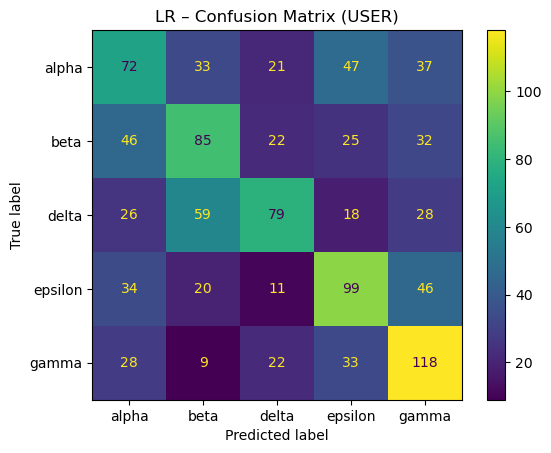


MODEL: Logistic Regression (YEAR)

Accuracy: 0.2561904761904762
              precision    recall  f1-score   support

        2019       0.30      0.27      0.28       153
        2020       0.26      0.30      0.28       152
        2021       0.13      0.09      0.11       140
        2022       0.26      0.25      0.25       155
        2023       0.27      0.23      0.25       159
        2024       0.25      0.17      0.20       144
        2025       0.27      0.48      0.35       147

    accuracy                           0.26      1050
   macro avg       0.25      0.25      0.25      1050
weighted avg       0.25      0.26      0.25      1050



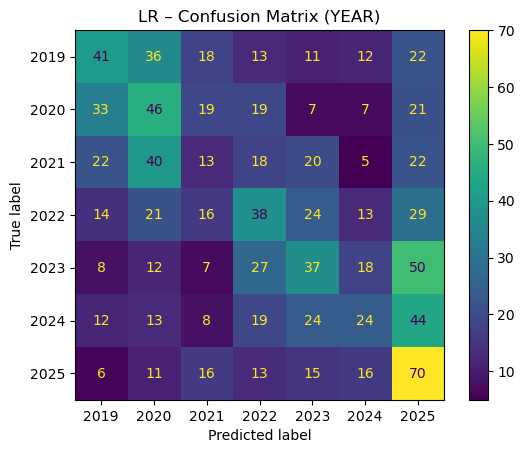

In [7]:
# =========================================================
# 6. LOGISTIC REGRESSION
# =========================================================
print("\n==============================")
print("MODEL: Logistic Regression (USER)")
print("==============================")

lr_user = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, random_state=0))
])

# Train
lr_user.fit(X_train, y_user_train)

# Predict probabilities
y_prob_lr1 = lr_user.predict_proba(X_test)

# Predict classes
y_pred_lr1 = lr_user.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_user_test, y_pred_lr1))
print(classification_report(y_user_test, y_pred_lr1))

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_user_test, y_pred_lr1),
    display_labels = lr_user.classes_
)

disp.plot()
plt.title("LR – Confusion Matrix (USER)")
plt.show()


print("\n==============================")
print("MODEL: Logistic Regression (YEAR)")
print("==============================")

lr_year = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, random_state=0))
])

# Train
lr_year.fit(X_train, y_year_train)

# Predict probabilities
y_prob_lr2 = lr_year.predict_proba(X_test)

# Predict classes
y_pred_lr2 = lr_year.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_year_test, y_pred_lr2))
print(classification_report(y_year_test, y_pred_lr2))

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_year_test, y_pred_lr2),
    display_labels = lr_year.classes_
)

disp.plot()
plt.title("LR – Confusion Matrix (YEAR)")
plt.show()




MODEL: KNN (USER)
Best K: {'knn__n_neighbors': 11}

Nearest neighbor classes:
['alpha' 'alpha' 'epsilon' 'delta' 'delta' 'alpha' 'epsilon' 'beta'
 'epsilon' 'delta' 'delta']


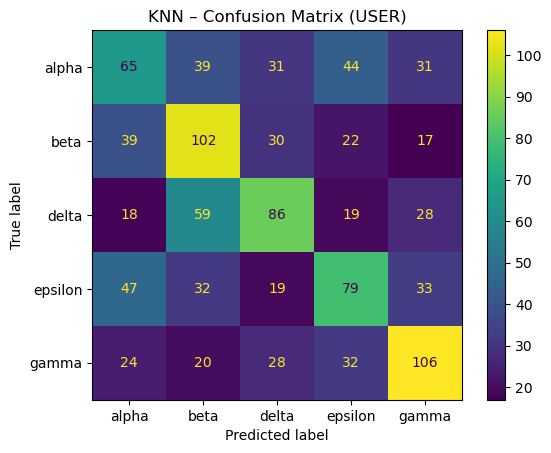


Accuracy: 0.41714285714285715
              precision    recall  f1-score   support

       alpha       0.34      0.31      0.32       210
        beta       0.40      0.49      0.44       210
       delta       0.44      0.41      0.43       210
     epsilon       0.40      0.38      0.39       210
       gamma       0.49      0.50      0.50       210

    accuracy                           0.42      1050
   macro avg       0.42      0.42      0.42      1050
weighted avg       0.42      0.42      0.42      1050


MODEL: KNN (year)
Best K: {'knn__n_neighbors': 11}

Nearest neighbor YEAR labels:
[2025 2024 2024 2020 2022 2024 2022 2019 2022 2022 2021]


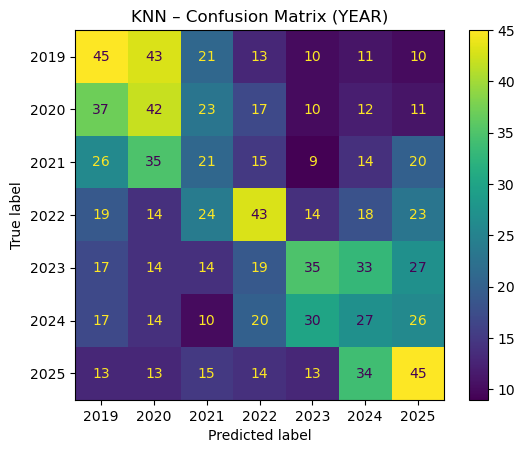


Accuracy: 0.24571428571428572
              precision    recall  f1-score   support

        2019       0.26      0.29      0.28       153
        2020       0.24      0.28      0.26       152
        2021       0.16      0.15      0.16       140
        2022       0.30      0.28      0.29       155
        2023       0.29      0.22      0.25       159
        2024       0.18      0.19      0.18       144
        2025       0.28      0.31      0.29       147

    accuracy                           0.25      1050
   macro avg       0.25      0.24      0.24      1050
weighted avg       0.25      0.25      0.24      1050



In [8]:
# =========================================================
# 7. KNN
# =========================================================
print("\n==============================")
print("MODEL: KNN (USER)")
print("==============================")

knn_pipe_user = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7, weights="uniform"))
])
knn_pipe_user.set_output(transform="pandas")
param_grid = {"knn__n_neighbors": [3,5,7,9,11]}
gs_knn_user = GridSearchCV(knn_pipe_user, param_grid, cv=5)
gs_knn_user.fit(X_train, y_user_train)

print("Best K:", gs_knn_user.best_params_)

knn_user = gs_knn_user.best_estimator_

y_pred_knn1 = knn_user.predict(X_test)
y_prob_knn1 = knn_user.predict_proba(X_test)


# Nearest neighbors
distances, indices = knn_user.named_steps["knn"].kneighbors(X_test.iloc[:1])
print("\nNearest neighbor classes:")
print(y_user_train.iloc[indices[0]].values)

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_user_test, y_pred_knn1),
    display_labels = knn_user.classes_
)

disp.plot()
plt.title("KNN – Confusion Matrix (USER)")
plt.show()

# Evaluation
print("\nAccuracy:", accuracy_score(y_user_test, y_pred_knn1))
print(classification_report(y_user_test, y_pred_knn1))

print("\n==============================")
print("MODEL: KNN (year)")
print("==============================")
knn_pipe_year = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7, weights="uniform"))
])
knn_pipe_year.set_output(transform="pandas")
param_grid = {"knn__n_neighbors": [3,5,7,9,11]}
gs_knn_year = GridSearchCV(
    knn_pipe_year,
    param_grid,
    cv=5
)

gs_knn_year.fit(X_train, y_year_train)

print("Best K:", gs_knn_year.best_params_)

knn_year = gs_knn_year.best_estimator_

# Predict
y_pred_knn2 = knn_year.predict(X_test)
y_prob_knn2 = knn_year.predict_proba(X_test)


# Nearest neighbors
distances, indices = knn_year.named_steps["knn"].kneighbors(X_test.iloc[:1])
print("\nNearest neighbor YEAR labels:")
print(y_year_train.iloc[indices[0]].values)

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_year_test, y_pred_knn2),
    display_labels = knn_year.classes_
)

disp.plot()
plt.title("KNN – Confusion Matrix (YEAR)")
plt.show()

# Evaluation
print("\nAccuracy:", accuracy_score(y_year_test, y_pred_knn2))
print(classification_report(y_year_test, y_pred_knn2))


MODEL: SVM (RBF, USER)


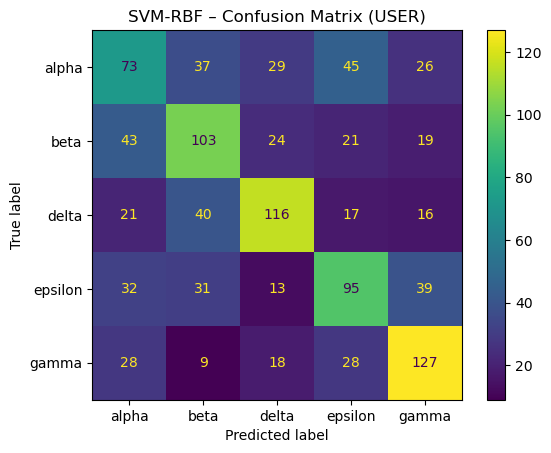


Accuracy: 0.4895238095238095
              precision    recall  f1-score   support

       alpha       0.37      0.35      0.36       210
        beta       0.47      0.49      0.48       210
       delta       0.58      0.55      0.57       210
     epsilon       0.46      0.45      0.46       210
       gamma       0.56      0.60      0.58       210

    accuracy                           0.49      1050
   macro avg       0.49      0.49      0.49      1050
weighted avg       0.49      0.49      0.49      1050


MODEL: SVM (RBF, YEAR)


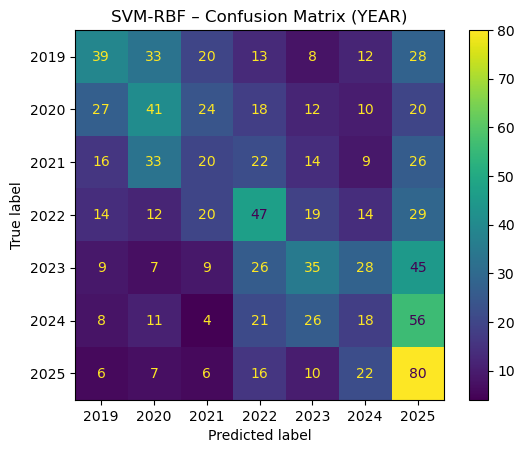


Accuracy: 0.26666666666666666
              precision    recall  f1-score   support

        2019       0.33      0.25      0.29       153
        2020       0.28      0.27      0.28       152
        2021       0.19      0.14      0.16       140
        2022       0.29      0.30      0.30       155
        2023       0.28      0.22      0.25       159
        2024       0.16      0.12      0.14       144
        2025       0.28      0.54      0.37       147

    accuracy                           0.27      1050
   macro avg       0.26      0.27      0.25      1050
weighted avg       0.26      0.27      0.26      1050



In [9]:
# =========================================================
# 8. SVM — DIFFERENT KERNEL FUNCTIONS
# =========================================================
print("\n==============================")
print("MODEL: SVM (RBF, USER)")
print("==============================")

svm_user = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=0))
])

svm_user.fit(X_train, y_user_train)

y_pred_svm1 = svm_user.predict(X_test)
y_prob_svm1 = svm_user.predict_proba(X_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_user_test, y_pred_svm1),
    display_labels = svm_user.classes_
)

disp.plot()
plt.title("SVM-RBF – Confusion Matrix (USER)")
plt.show()

print("\nAccuracy:", accuracy_score(y_user_test, y_pred_svm1))
print(classification_report(y_user_test, y_pred_svm1))

print("\n==============================")
print("MODEL: SVM (RBF, YEAR)")
print("==============================")

svm_year = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=0))
])

# Train
svm_year.fit(X_train, y_year_train)

# Predict
y_pred_svm2 = svm_year.predict(X_test)
y_prob_svm2 = svm_year.predict_proba(X_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_year_test, y_pred_svm2),
    display_labels = svm_year.classes_
)

disp.plot()
plt.title("SVM-RBF – Confusion Matrix (YEAR)")
plt.show()

# Evaluation
print("\nAccuracy:", accuracy_score(y_year_test, y_pred_svm2))
print(classification_report(y_year_test, y_pred_svm2))

In [10]:
# =========================================================
# 9. DECISION TREE (PRE-PRUNING)
# =========================================================
print("\n==============================")
print("MODEL: Decision Tree (USER)")
print("==============================")

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [5, 10]
}

gs_dt_user = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=5
)

gs_dt_user.fit(X_train, y_user_train)

print("Best DT parameters (USER):", gs_dt_user.best_params_)

dt_user = gs_dt_user.best_estimator_

dt_user = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=10,
    random_state=0
)

dt_user.fit(X_train, y_user_train)

y_pred_dt1 = dt_user.predict(X_test)
y_prob_dt1 = dt_user.predict_proba(X_test)

print("\nAccuracy:", accuracy_score(y_user_test, y_pred_dt1))
print(classification_report(y_user_test, y_pred_dt1))


print("\n==============================")
print("MODEL: Decision Tree (YEAR)")
print("==============================")

param_grid = {
    "max_depth": [3,5,7,9],
    "min_samples_leaf": [5,10,20]
}

gs_dt_year = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=5
)

gs_dt_year.fit(X_train, y_year_train)

print("Best parameters:", gs_dt_year.best_params_)

dt_year = gs_dt_year.best_estimator_
dt_year = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=10,
    random_state=0
)

dt_year.fit(X_train, y_year_train)

# Predict
y_pred_dt2 = dt_year.predict(X_test)
y_prob_dt2 = dt_year.predict_proba(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_year_test, y_pred_dt2))
print(classification_report(y_year_test, y_pred_dt2))



MODEL: Decision Tree (USER)
Best DT parameters (USER): {'max_depth': 7, 'min_samples_leaf': 5}

Accuracy: 0.43047619047619046
              precision    recall  f1-score   support

       alpha       0.37      0.23      0.29       210
        beta       0.40      0.46      0.43       210
       delta       0.44      0.46      0.45       210
     epsilon       0.41      0.50      0.45       210
       gamma       0.52      0.50      0.51       210

    accuracy                           0.43      1050
   macro avg       0.43      0.43      0.42      1050
weighted avg       0.43      0.43      0.42      1050


MODEL: Decision Tree (YEAR)
Best parameters: {'max_depth': 5, 'min_samples_leaf': 20}

Accuracy: 0.23523809523809525
              precision    recall  f1-score   support

        2019       0.27      0.23      0.25       153
        2020       0.25      0.28      0.26       152
        2021       0.14      0.17      0.16       140
        2022       0.31      0.23      0.26      

In [170]:
# =========================================================
# 10. RESULTS COMPARISON
# =========================================================
import pandas as pd
from sklearn.metrics import accuracy_score

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "SVM (RBF)",
        "Decision Tree"
    ],
    "USER Accuracy": [
        accuracy_score(y_user_test, lr_user.predict(X_test)),
        accuracy_score(y_user_test, knn_user.predict(X_test)),
        accuracy_score(y_user_test, svm_user.predict(X_test)),
        accuracy_score(y_user_test, dt_user.predict(X_test))
    ],
    "YEAR Accuracy": [
        accuracy_score(y_year_test, lr_year.predict(X_test)),
        accuracy_score(y_year_test, knn_year.predict(X_test)),
        accuracy_score(y_year_test, svm_year.predict(X_test)),
        accuracy_score(y_year_test, dt_year.predict(X_test))
    ]
})

print("=== RESULTS COMPARISON (USER + YEAR) ===")
print(results)


=== RESULTS COMPARISON (USER + YEAR) ===
                 Model  USER Accuracy  YEAR Accuracy
0  Logistic Regression       0.431429       0.256190
1                  KNN       0.417143       0.245714
2            SVM (RBF)       0.489524       0.266667
3        Decision Tree       0.430476       0.235238


In [ ]:
# =========================================================
# 11. FINAL MODEL SELECTION
# =========================================================
final_model_name = "SVM RBF"

print("=== FINAL MODEL SELECTION ===")
print("Selected model:", final_model_name)

final_user_model_user = svm_user.fit(X, y_user)
final_year_model_year = svm_year.fit(X, y_year)

# =========================================================
# 12. FINAL MODEL → PREDICT UNLABELED
# =========================================================
unlabeled = unlabeled.copy()

unlabeled["user"] = unlabeled["user"]
unlabeled["top_year"] = unlabeled["top_year"]
unlabeled["user"] = final_user_model_user.predict(unlabeled[feature_cols])
unlabeled["top_year"] = final_year_model_year.predict(unlabeled[feature_cols])

completed = pd.concat([labeled, unlabeled], ignore_index=True)

completed["top_year"] = pd.to_numeric(
    completed["top_year"],
    errors="coerce"
)

completed["top_year"] = completed["top_year"].astype(int)

print("Completed dataset created.")
print("Total samples:", completed.shape[0])
print("user uniques:", completed["user"].unique()[:10])
print("year uniques:", completed["top_year"].unique()[:10])

=== FINAL MODEL SELECTION ===
Selected model: SVM RBF


In [163]:
# =========================================================
# 13. EXPORT PLAYLISTS
# =========================================================

years = sorted(completed["top_year"].unique())
print("=== Exporting CSV files by YEAR ===")
for year in years:
    subset = completed[completed["top_year"] == year]
    subset.to_csv(f"top_{year}.csv", index=False)
    print(f"top_{year}.csv")

=== Exporting CSV files by YEAR ===
top_2019.csv
top_2020.csv
top_2021.csv
top_2022.csv
top_2023.csv
top_2024.csv
top_2025.csv
